In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:\\Users\\akasa\\Downloads\\abalone.csv',index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Text(0.5, 1.0, 'Rings')

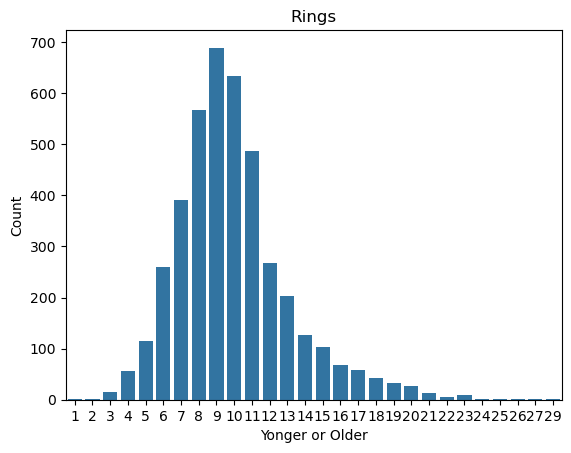

In [3]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [4]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

# Rings 값이 3부터 23 사이인 데이터만 필터링
data = df[(df['Rings'] >= 3) & (df['Rings'] <= 23)]

# Rings의 고유한 값들을 0부터 시작하는 인덱스로 재매핑
unique_rings = sorted(data['Rings'].unique())  # 고유한 값들을 정렬
encoding_map = {ring: idx for idx, ring in enumerate(unique_rings)}  # 재매핑

# 인코딩 적용
df['Rings'] =data['Rings'].map(encoding_map)

# 결과 출력
print(df)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                                 
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
id                                         
0             0.1010       

Text(0.5, 1.0, 'Rings')

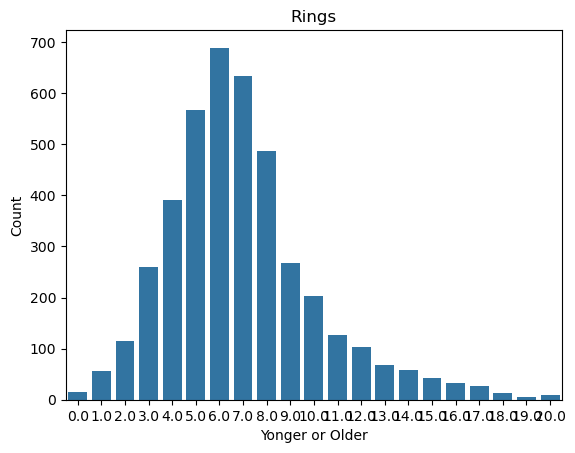

In [6]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             9
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [9]:
df = df.drop('Sex',axis=1)

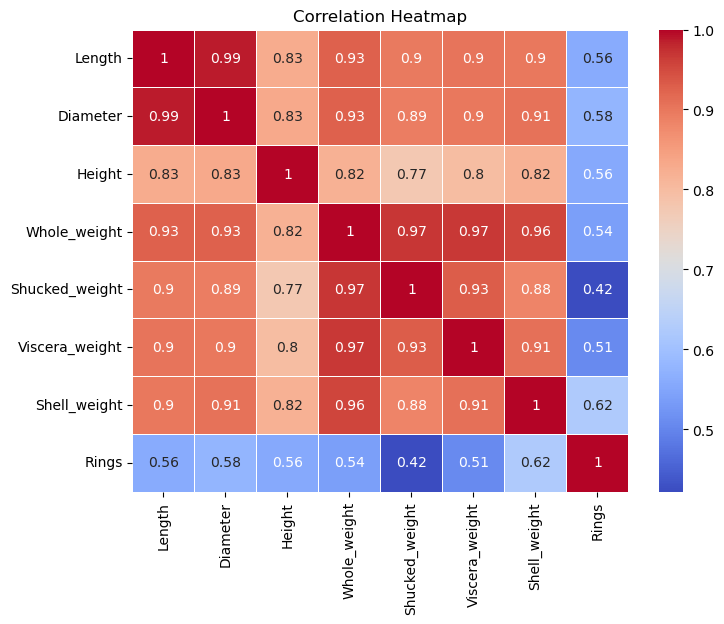

In [10]:
# 상관계수 계산
correlation_matrix = df.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
import numpy as np
import pandas as pd

def remove_outliers(data, column):
    # 사분위수를 이용해 이상치 제거
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1  # IQR: Interquartile Range (사분위 범위)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 이상치가 아닌 데이터만 필터링
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data
    
df_other = df
df_other = remove_outliers(df_other,df_other.columns)
df_other

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,12.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,4.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,6.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,7.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,4.0
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,8.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,7.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,6.0


In [12]:
import tensorflow as tf

#sex label encoding 1(label encoding)
#target_label = df['Sex']
#target_label.dtype
#mapping = {'M':0, 'F':1,'I':2}
#df['Sex'] = target_label.map(mapping)

#target 데이터 옮기기
target = df_other['Diameter']
df_no_ring = df_other.drop('Rings',axis=1)
df_no_ring = df_no_ring.drop('Diameter',axis=1)
df_no_ring.dropna()

#maxminscale을 위한 데이터 분리
#one_hot = df['Sex']
#df_other = df_no_ring.drop('Sex',axis=1)
#df_no_ring.head()

,Length,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,
0,0.455,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...
4172,0.565,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.205,1.1760,0.5255,0.2875,0.3080


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df_no_ring)
df_scaled = pd.DataFrame(df_scaled,columns=df_no_ring.columns)
#df_scaled = pd.concat([df_scaled,one_hot],axis=1)
df_scaled

,Length,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.409836,0.275,0.229791,0.230530,0.205312,0.237864
1,0.237705,0.250,0.098774,0.100727,0.098059,0.108414
2,0.532787,0.475,0.303815,0.263759,0.288049,0.334951
3,0.385246,0.425,0.230699,0.221184,0.231869,0.245955
4,0.204918,0.200,0.089464,0.090343,0.079673,0.084142
...,...,...,...,...,...,...
4163,0.590164,0.625,0.399183,0.381620,0.487232,0.398058
4164,0.631148,0.475,0.435059,0.453271,0.437181,0.416667
4165,0.647541,0.825,0.530427,0.543094,0.586313,0.493528
4166,0.688525,0.550,0.493415,0.548806,0.532176,0.474110


In [14]:
df_scaled = df_scaled.dropna()
df_scaled

,Length,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.409836,0.275,0.229791,0.230530,0.205312,0.237864
1,0.237705,0.250,0.098774,0.100727,0.098059,0.108414
2,0.532787,0.475,0.303815,0.263759,0.288049,0.334951
3,0.385246,0.425,0.230699,0.221184,0.231869,0.245955
4,0.204918,0.200,0.089464,0.090343,0.079673,0.084142
...,...,...,...,...,...,...
4163,0.590164,0.625,0.399183,0.381620,0.487232,0.398058
4164,0.631148,0.475,0.435059,0.453271,0.437181,0.416667
4165,0.647541,0.825,0.530427,0.543094,0.586313,0.493528
4166,0.688525,0.550,0.493415,0.548806,0.532176,0.474110


Text(0.5, 1.0, 'Diameter')

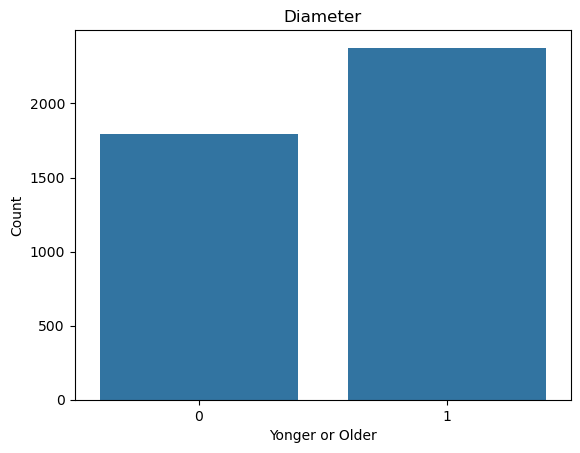

In [15]:
#청년층의 비율을 0.3정도로 잡고 yonger/older 클래스를 나눈다

df['Diameter'] = df['Diameter'].apply(lambda x: 0 if x <= 0.4 else 1)
df['Diameter']

sns.countplot(data = df, x="Diameter")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Diameter")

In [16]:
df_scaled['Diameter'] = df['Diameter']

C:\Users\akasa\AppData\Local\Temp\ipykernel_21580\2316014582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled['Diameter'] = df['Diameter']


In [17]:
df_scaled

,Length,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Diameter
0,0.409836,0.275,0.229791,0.230530,0.205312,0.237864,0.0
1,0.237705,0.250,0.098774,0.100727,0.098059,0.108414,0.0
2,0.532787,0.475,0.303815,0.263759,0.288049,0.334951,1.0
3,0.385246,0.425,0.230699,0.221184,0.231869,0.245955,0.0
4,0.204918,0.200,0.089464,0.090343,0.079673,0.084142,0.0
...,...,...,...,...,...,...,...
4163,0.590164,0.625,0.399183,0.381620,0.487232,0.398058,0.0
4164,0.631148,0.475,0.435059,0.453271,0.437181,0.416667,0.0
4165,0.647541,0.825,0.530427,0.543094,0.586313,0.493528,0.0
4166,0.688525,0.550,0.493415,0.548806,0.532176,0.474110,0.0


In [18]:
# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(df_scaled.isna().sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df_scaled).sum())

데이터에 NaN이 있는지 확인:
Length            0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Diameter          8
dtype: int64
데이터에 무한대 값이 있는지 확인:
Length            0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Diameter          0
dtype: int64


In [19]:
df_scaled = df_scaled.dropna()
df_scaled.isnull().sum()

Length            0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Diameter          0
dtype: int64

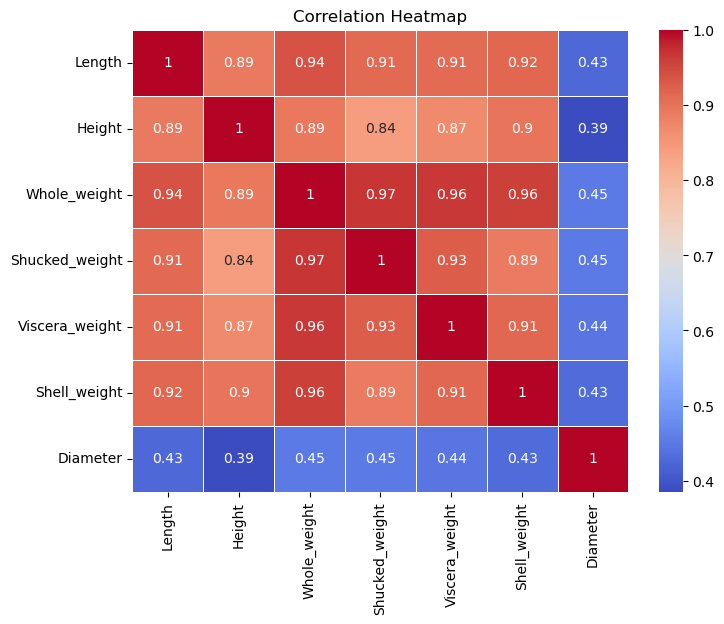

In [20]:
# 상관계수 계산
correlation_matrix = df_scaled.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
X = df_scaled.drop('Diameter',axis=1)
y = df_scaled['Diameter'].values
print(X)
print(y)

        Length  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0     0.409836   0.275      0.229791        0.230530        0.205312   
1     0.237705   0.250      0.098774        0.100727        0.098059   
2     0.532787   0.475      0.303815        0.263759        0.288049   
3     0.385246   0.425      0.230699        0.221184        0.231869   
4     0.204918   0.200      0.089464        0.090343        0.079673   
...        ...     ...           ...             ...             ...   
4163  0.590164   0.625      0.399183        0.381620        0.487232   
4164  0.631148   0.475      0.435059        0.453271        0.437181   
4165  0.647541   0.825      0.530427        0.543094        0.586313   
4166  0.688525   0.550      0.493415        0.548806        0.532176   
4167  0.827869   0.775      0.881244        0.979232        0.768131   

      Shell_weight  
0         0.237864  
1         0.108414  
2         0.334951  
3         0.245955  
4         0.084142  
...      

In [22]:
# window_size 설정
window_size = 30

# LSTM 모델에 맞게 데이터 재구성
data_X = []
data_y = []

# 슬라이딩 윈도우로 데이터 분할
for i in range(len(X) - window_size):
    data_X.append(X[i:i + window_size])  # time_steps = window_size
    data_y.append(y[i + window_size])    # 해당 시점의 타겟 값

# numpy 배열로 변환
data_X = np.array(data_X)
data_y = np.array(data_y)

print("변환된 X shape:", data_X.shape)  # (samples, time_steps, features)
print("변환된 y shape:", data_y.shape)  # (samples,)

# 데이터 분할 (train, validation, test)
train_size = int(len(data_y) * 0.7)  # 70%를 훈련 데이터로
val_size = int(len(data_y) * 0.15)   # 15%를 검증 데이터로
test_size = len(data_y) - train_size - val_size  # 나머지를 테스트 데이터로

X_train = data_X[:train_size]
y_train = data_y[:train_size]

X_val = data_X[train_size:train_size + val_size]
y_val = data_y[train_size:train_size + val_size]

X_test = data_X[train_size + val_size:]
y_test = data_y[train_size + val_size:]

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

변환된 X shape: (3989, 30, 6)
변환된 y shape: (3989,)
Train set: (2792, 30, 6) (2792,)
Validation set: (598, 30, 6) (598,)
Test set: (599, 30, 6) (599,)


In [23]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)
y_val_df = pd.DataFrame(y_val)

for col in y_train_df.columns:
    print(f"Unique values in column {col}: {y_train_df[col].unique()}")
print(y_train_df.value_counts())

for col in y_test_df.columns:
    print(f"Unique values in column {col}: {y_test_df[col].unique()}")
print(y_test_df.value_counts())

for col in y_val_df.columns:
    print(f"Unique values in column {col}: {y_val_df[col].unique()}")
print(y_val_df.value_counts())

Unique values in column 0: [1. 0.]
0  
1.0    1537
0.0    1255
Name: count, dtype: int64
Unique values in column 0: [0. 1.]
0  
1.0    379
0.0    220
Name: count, dtype: int64
Unique values in column 0: [1. 0.]
0  
1.0    338
0.0    260
Name: count, dtype: int64


In [24]:
# #LSTM이 요구하는 방식으로 데이터 형식 변환
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2
import tensorflow as tf

# 모델 생성
model = Sequential()
#마지막 lstm층은 무조건 false
model.add(LSTM(units=100, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류의 경우 sigmoid 사용
model.summary()

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 평가
model.evaluate(X_test, y_test)

# 손실 그래프 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

C:\Users\akasa\anaconda3\envs\DLA\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,901 (167.58 KB)

 Trainable params: 42,901 (167.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5117 - loss: 0.7994 - val_accuracy: 0.5652 - val_loss: 0.7558
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5400 - loss: 0.7331 - val_accuracy: 0.6020 - val_loss: 0.6722
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7005 - loss: 0.6202 - val_accuracy: 0.7960 - val_loss: 0.5728
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8129 - loss: 0.5269 - val_accuracy: 0.7977 - val_loss: 0.5043
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8400 - loss: 0.4516 - val_accuracy: 0.8027 - val_loss: 0.5100
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8055 - loss: 0.4755 - val_accuracy: 0.7910 - val_loss: 0.4855
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8324 - loss: 0.4446 - val_accuracy: 0.8043 - val_loss: 0.5167
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8358 - loss: 0.4419 - val_accuracy: 0.79